In [1]:
import pandas as pd

df = pd.read_csv("diabetes_selected_features.csv")
X = df.drop(columns=['Outcome'])
y = df['Outcome']


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.
KNN trained successfully.


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {roc:.4f}")

# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model, X_test, y_test)



Logistic Regression Performance:
Accuracy:  0.7208
Precision: 0.6222
Recall:    0.5185
F1 Score:  0.5657
ROC AUC:   0.6743

Random Forest Performance:
Accuracy:  0.7403
Precision: 0.6458
Recall:    0.5741
F1 Score:  0.6078
ROC AUC:   0.7020

SVM Performance:
Accuracy:  0.7078
Precision: 0.6000
Recall:    0.5000
F1 Score:  0.5455
ROC AUC:   0.6600

KNN Performance:
Accuracy:  0.7078
Precision: 0.5918
Recall:    0.5370
F1 Score:  0.5631
ROC AUC:   0.6685


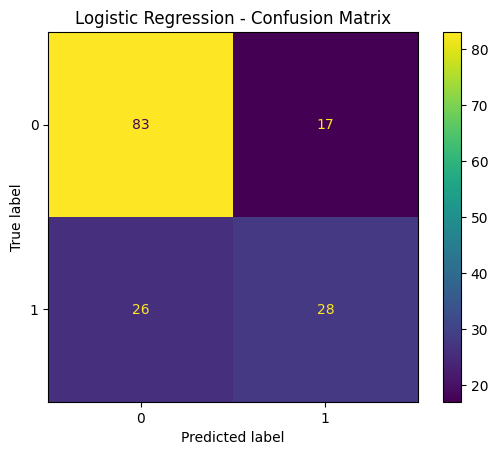

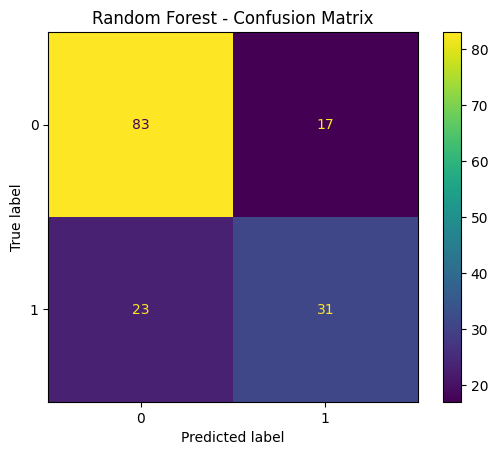

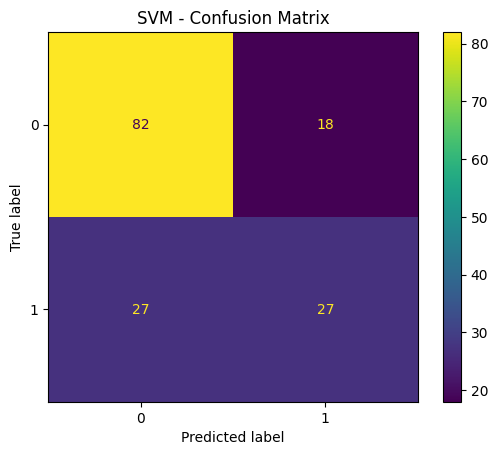

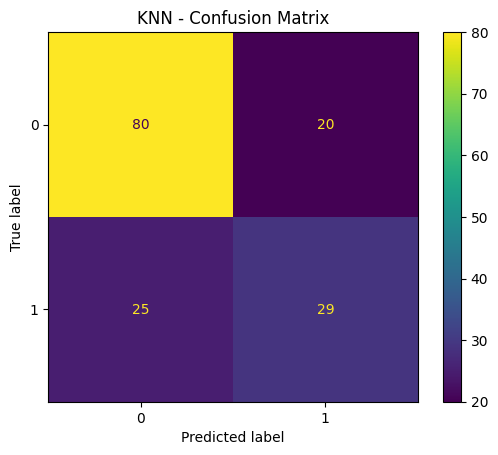

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [6]:
import joblib

# Save the model
joblib.dump(models["Random Forest"], "random_forest_model.pkl")
print("Random Forest model saved!")


Random Forest model saved!
